In [11]:
import urllib.request
from konlpy.tag import Okt
from ckonlpy.tag import Twitter
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import pickle

In [2]:
# 텍스트 정제
def cleartext(text):
    text = text.replace("\n"," ").replace("\t","").replace("\r","").replace(",","").replace("\xa0","").replace("\x1e","").strip(" ")
    return text

In [3]:
# 거래소공시 홈페이지에서 종목별 사업보고서 내용 중 "II.사업의 내용"을 크롤링한 후 pickle형식으로 저장한 파일을 불러옴
with open('D:/Users/131006/Desktop/py/nlp_test/dic_bungi_final_3.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [12]:
twitter = Twitter()

C:\Users\131006\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [6]:
df = pd.DataFrame(data)

In [7]:
df = df.transpose()

In [8]:
df

,name,title,text1
39,다우데이타,[정정]분기보고서(일반법인)(2020.03),II. 사업의 내용 1. 사업의 개요 연결기업은 제공하는 재화나 용역에 근거하여 ...
41,다우기술,[정정]분기보고서(일반법인)(2020.03),II. 사업의 내용 1. 사업의 개요지배회사 및 종속회사의 사업부문별 현황을 요...
58,네오펙트,분기보고서(일반법인)(2020.03),II. 사업의 내용 1. 사업의 개요당사는 인공지능(AI) 및 사물인터넷(IoT...
61,GRT,분기보고서(일반법인)(2020.03),II. 사업의 내용 1. 사업의 개요가. 산업의 이해(1) 영위하고 있는 사업 ...
72,위지윅스튜디오,분기보고서(일반법인)(2020.03),II. 사업의 내용 당사는 CG/VFX 기술을 기반으로 한 기술 서비스를 주로 제...
...,...,...,...
449,케이엠더블유,분기보고서(일반법인)(2020.03),II. 사업의 내용을 참조하시기 바랍니다.(7) 계열회사에 관한 사항당사는 본 보고...
453,라닉스,분기보고서(일반법인)(2020.03),II. 사업의 내용 [용어 설명표] 용 어 설 ...
459,네오셈,분기보고서(일반법인)(2020.03),II. 사업의 내용 1. 사업의 개요 당사는 2002년 4월 설립된 반도체 ...
470,삼일제약,분기보고서(일반법인)(2020.03),II. 사업의 내용 1. 사업의 개요가. 업계의 현황 1) 사업의 특성제약산...


In [15]:
cleartext(data[39]['text1'])

'II. 사업의 내용 1. 사업의 개요  연결기업은 제공하는 재화나 용역에 근거하여 영업부문을 구분하고 각 부문의 재무정보를 내부관리목적으로 활용하고 있는 바 보고영업부문은 다음과 같습니다.         구분 부문 영업의 성격     비금융사업부 소프트웨어 및하드웨어공급부문 컴퓨터 하드웨어 및 소프트웨어의 판매 및 서비스 제공   부가통신부문 및결제대행업 물류 및 신용판매 등의 결제시스템에 대한 네트웍구성 및 정보제공   시스템구축본부 일반기업 및 공공기관을 대상으로 시스템 구축 용역제공   콘텐츠본부 영화 및 만화 콘텐츠의 투자 제작 및 배급업무   인력공급부문 구인구직사업 온라인 정보제공업 근로자 파견업 국내외 유료직업  소개 사업   건물관리본부 빌딩관리업 부동산컨설팅 개발 분양 주된 사업목적 임대   기타 컴퓨터 및 주변기기 판매 정보처리 및 컴퓨터운용 반도체 설계 OTP (One Time Password)인증보안 및 HSM(Hardware Security Module)서비스 광고대행 등의 기타사업   금융사업부 홀세일총괄본부 국내외 기관들의 주식 및 파생상품 거래 서비스 및 시장 정보를 제공하는 법인영업 채권중개를 하는 채권영업업무   IB사업본부 전통적인 업무인 IPO외에도 회사채의 발행 및 주선 부동산 PF 대체투자 ABCP 및 ABS의 발행과 주선 기타 구조화금융 등 기업들이 필요로 하는 모든 자금조달 기능을 지원하는 업무   투자운용본부 회사의 수익성 향상 및 수익원 다각화를 위해 메자닌 투자 Private Equity 선물/옵션 매매 다양한 차익 거래 등의 업무 ELS 및 ELW와 같은 장외파생상품을 중개하는 장외파생상품 영업의 업무   리테일총괄본부 국내증권 브로커리지 서비스와 온라인 펀드 서비스 해외주식 서비스 FX마진 트레이딩 등 고객 접점의 업무   기타 금융사업부 연결대상회사    주) 연결대상 종속회사 중 실질적인 영업활동을 수행하지 않는 수익증권 등은 제외함. 2. 주요 사업 부문별 현황 가. 사업부문별로 ㈜다우데이타와 그 종속

In [14]:
twitter.add_dictionary('5G', 'Noun')

In [26]:
twitter.add_dictionary('4G', 'Noun')
twitter.add_dictionary('차세대이동통신', 'Noun')
twitter.add_dictionary('차세대 이동통신', 'Noun')

In [27]:
%%time

tokenized_data = []
for sentence in df['text1']:
    #cleartext(sentence)
    temp_X = twitter.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

Wall time: 2min 32s


기업개요의 최대 길이 : 97406
기업개요의 평균 길이 : 9439.207482993197


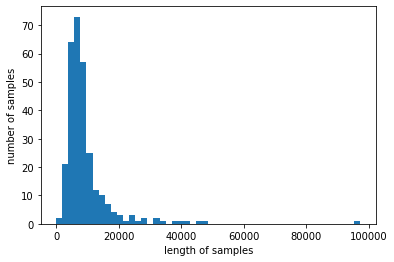

In [28]:
print('기업개요의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기업개요의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(19713, 100)

In [30]:
model.wv.most_similar("5G")

[('4G', 0.7540140151977539),
 ('LTE', 0.7322618961334229),
 ('이동통신', 0.6928412914276123),
 ('진화', 0.6815091967582703),
 ('시대', 0.6686410903930664),
 ('IoT', 0.6556827425956726),
 ('통신망', 0.6403546333312988),
 ('클라우드', 0.639681339263916),
 ('개막', 0.6167402267456055),
 ('사물인터넷', 0.6152828931808472)]

In [38]:
model.wv.most_similar("카카오")

[('월드', 0.8683474063873291),
 ('메신저', 0.8426101803779602),
 ('톡', 0.8290786743164062),
 ('Google', 0.828615665435791),
 ('디즈니', 0.8192611336708069),
 ('네이버', 0.8157958984375),
 ('BringGo', 0.8142637610435486),
 ('챗봇', 0.8135436773300171),
 ('유튜브', 0.8110190629959106),
 ('아쿠아', 0.8104721903800964)]